## 过拟合和欠拟合
* 过拟合：模型能很好地拟合训练样本，但是对新数据的预测准确性很差
* 欠拟合：模型不能很好地拟合训练样本，且对新数据的预测也不好

In [6]:
from imports import *

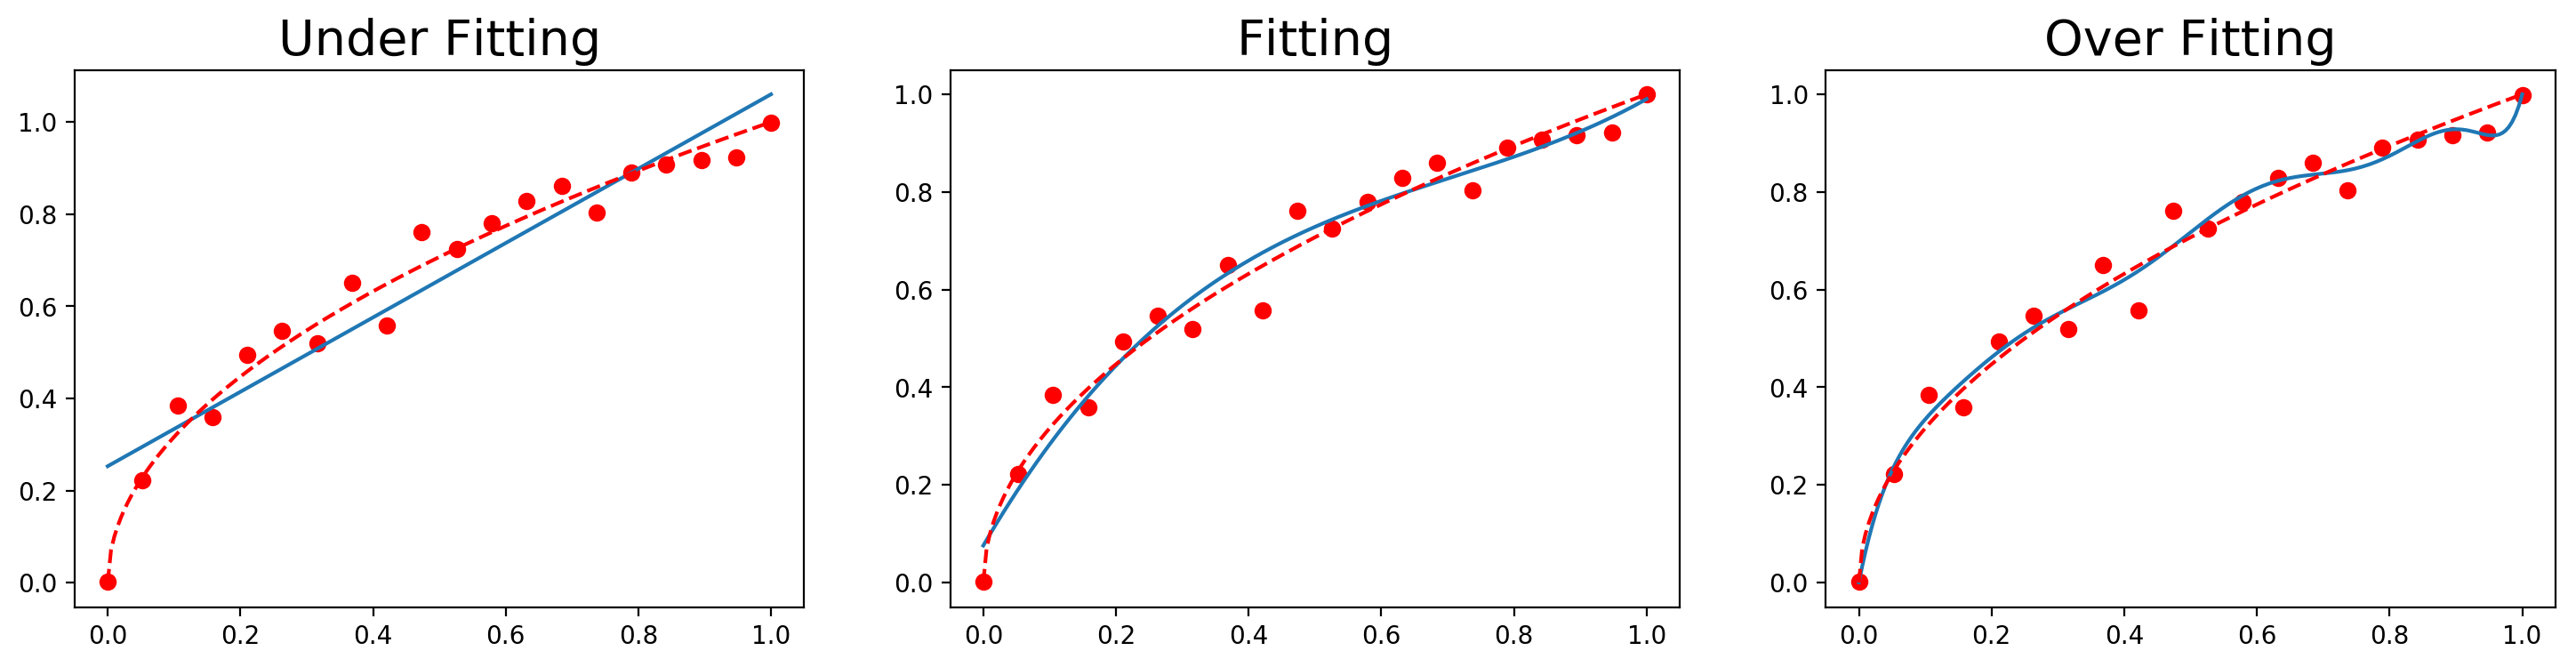

In [7]:
n_dots = 20

x = np.linspace(0, 1, n_dots)                   # [0, 1] 之间创建 20 个点
y = np.sqrt(x) + 0.2*np.random.rand(n_dots) - 0.1;

def plot_polynomial_fit(x, y, order):
    p = np.poly1d(np.polyfit(x, y, order))

    # 画出拟合出来的多项式所表达的曲线以及原始的点
    t = np.linspace(0, 1, 200)
    plt.plot(x, y, 'ro', t, p(t), '-', t, np.sqrt(t), 'r--')
    return p

plt.figure(figsize=(18, 4), dpi=200)
titles = ['Under Fitting', 'Fitting', 'Over Fitting']
models = [None, None, None]
for index, order in enumerate([1, 3, 10]): # 分别对应：一阶多项式，三阶多项式，十阶多项式
    plt.subplot(1, 3, index + 1)
    models[index] = plot_polynomial_fit(x, y, order)
    plt.title(titles[index], fontsize=20)

## 成本函数
#### 成本是衡量模型与训练样本符合程度的指标，就是训练值与真实值的误差平均值
#### 成本函数就是成本与模型参数的函数关系
$$J(θ)=J(θ_0,θ_1)=\frac1{2m}{\sum_{i=1}^m}{(h(x^{(i)}-y^{(i)})^2} $$
m是训练样本个数，$ h(x^{(i)})$ 是模型对每个样本的预测值，$y^{(i)}$ 是每个样本的真实值

## 模型准确性
